# Task #2

A template code for training an RBM on Rydberg atom data (the full dataset) is provided below. For the first part of this task (determining the minimum number of hidden units), start with 20 hidden units. 

Imports and loadining in data:

In [1]:
from pathlib import Path
import numpy as np
import torch
from RBM_helper import RBM
import csv
import Rydberg_energy_calculator
from datetime import datetime

training_data = torch.from_numpy(np.loadtxt("Rydberg_data.txt"))
n_vis = training_data.shape[1]

target = 0.0001
exact_energy = -4.1203519096
print("Exact energy: ",exact_energy)
output_dir = Path("training_logs")

if not output_dir.exists():
    output_dir.mkdir(parents=True)
differences = {}
training_num = training_data.shape[0]
print(training_num)

def train(n_hin):
    rbm = RBM(n_vis, n_hin)
    epochs = 1000
    num_samples = 2000
    print('Starting training on n_h = ', n_hin)
    differences = []
    for e in range(1, epochs+1):
        # do one epoch of training
        rbm.train(training_data)

        # now generate samples and calculate the energy
        if e % 100 == 0:
            print("\nEpoch: ", e)
            # print("Sampling...")

            init_state = torch.zeros(num_samples, n_vis)
            # idx = np.random.rand(training_num)
            RBM_samples = rbm.draw_samples(100, init_state)

            # print("Done sampling. Calculating energy...")

            energies = Rydberg_energy_calculator.energy(RBM_samples, rbm.wavefunction)
            energy_difference = abs(exact_energy - energies.item())
            differences.append(energy_difference)
            print("Energy difference: ", energy_difference)
    return differences

Exact energy:  -4.1203519096
20000


In [2]:
from multiprocessing import Pool

with Pool(16) as p:
    results = p.map(train, range(100, 700, 100))

Starting training on n_h = Starting training on n_h = Starting training on n_h =  Starting training on n_h = Starting training on n_h = Starting training on n_h =    200 300 100400
500
600




Epoch:  100
Energy difference:  0.0009517129910916466

Epoch:  100
Energy difference:  0.0008028243726476703

Epoch:  100
Energy difference:  0.0006538300477005876

Epoch:  100
Energy difference:  0.000250792053813953

Epoch:  100
Energy difference:  0.000589492271219072

Epoch:  200
Energy difference:  0.0011172974905795385

Epoch:  100
Energy difference:  0.0006405473894508518

Epoch:  200
Energy difference:  0.0005713799735502789

Epoch:  200
Energy difference:  0.0005514090382865433

Epoch:  300
Energy difference:  0.001557513676768707

Epoch:  200
Energy difference:  0.00023012026259650042

Epoch:  300
Energy difference:  0.0005879930134700118

Epoch:  200
Energy difference:  0.00079122585641489

Epoch:  400
Energy difference:  0.0008951957799059329

Epoch:  200
Energy difference:  0.0004971

../aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
../aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
../aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
../aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
../aten/src/ATen/native/BinaryOps.cpp:81

In [3]:
print(results)

[[0.0009517129910916466, 0.0011172974905795385, 0.001557513676768707, 0.0008951957799059329, 0.0010994132972097503, 0.0013113812325400431, 0.0005698843150536703, 0.0007667962915878235, 0.0007462602300902788, 0.0008751679425307302], [0.0008028243726476703, 0.0005713799735502789, 0.0005879930134700118, 0.0013014364878767282, 0.0006842392594572644, 0.0004928207262304696, 0.0006617724886925913, 0.0004942235983822485, 0.0007038875068632322, 0.0006630112819436818], [0.0006538300477005876, 0.0005514090382865433, 0.00036005012253070845, 0.0004643254713556644, 0.0006011201466957772, 0.000451816729332144, 0.0007052139806065227, 0.0005271859801556644, 0.00048113080463796365, 0.00102247734927996], [0.000250792053813953, 0.00023012026259650042, 0.00040954854866104284, 0.0003271360525571865, 8.169106190436537e-05, 0.0004433531676779623, 0.0009010187757834132, 0.00033061407495171835, 0.000785912506381159, 0.0007887346444181986], [0.000589492271219072, 0.00079122585641489, 0.0004800764673849045, 0.000

In [2]:
output_dir = Path("training_logs")
#
# results_with_header = [[h] + result for (h, result) in zip(range(100, 700, 100), results)]
# with open(str(output_dir / f"task2-100_600.csv"), 'w') as f:
#     w = csv.writer(f)
#     w.writerows(results_with_header)
#

NameError: name 'Path' is not defined

In [5]:
from pathlib import Path
output_dir = Path("training_logs")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
# sns.set_context("paper", 1.5, {"lines.linewidth": 4})
# sns.set_palette("winter_r", 8, 1)
# sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
#         rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
df = pd.read_csv( str(output_dir / f"task2-100_600.csv"), header=None, index_col=0)
df.columns = range(100, 1000+100, 100)
df = df.T

df

,100,200,300,400,500,600
100,0.000952,0.000803,0.000654,0.000251,0.000589,0.000641
200,0.001117,0.000571,0.000551,0.000230,0.000791,0.000497
300,0.001558,0.000588,0.000360,0.000410,0.000480,0.001107
400,0.000895,0.001301,0.000464,0.000327,0.000587,0.000824
500,0.001099,0.000684,0.000601,0.000082,0.000645,0.000356
600,0.001311,0.000493,0.000452,0.000443,0.000745,0.000989
700,0.000570,0.000662,0.000705,0.000901,0.000402,0.000786
800,0.000767,0.000494,0.000527,0.000331,0.000503,0.001017
900,0.000746,0.000704,0.000481,0.000786,0.000409,0.000983
1000,0.000875,0.000663,0.001022,0.000789,0.000853,0.001382


Text(0, 0.5, 'Diff')

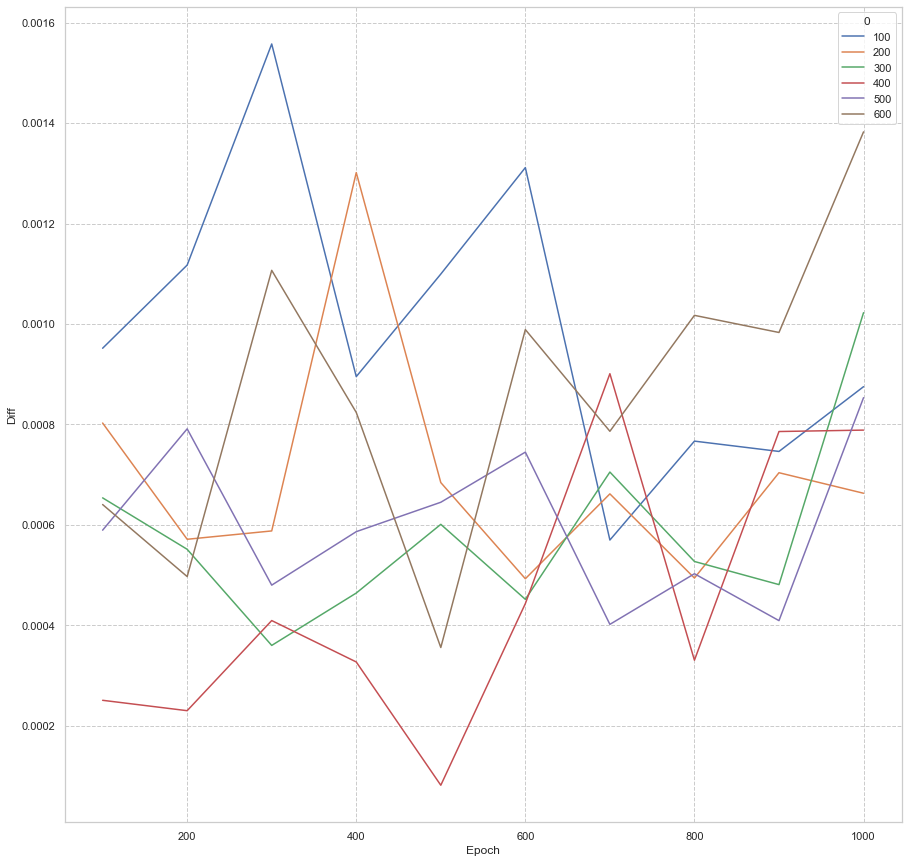

In [7]:
ax = df.plot(figsize=(15, 15))
ax.set_xlabel('Epoch')

ax.set_ylabel('Diff')